Epoch 1/25


c:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.0819 - loss: 2.7163 - val_accuracy: 0.1667 - val_loss: 2.6040
Epoch 2/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1650 - loss: 2.5871 - val_accuracy: 0.2000 - val_loss: 2.4372
Epoch 3/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2100 - loss: 2.4706 - val_accuracy: 0.2417 - val_loss: 2.3365
Epoch 4/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2647 - loss: 2.3443 - val_accuracy: 0.2458 - val_loss: 2.3292
Epoch 5/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2879 - loss: 2.2472 - val_accuracy: 0.2500 - val_loss: 2.3160
Epoch 6/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2994 - loss: 2.2395 - val_accuracy: 0.2708 - val_loss: 2.3128
Epoch 7/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3130 - loss: 2.1437 - val_accuracy: 0.2875 - val_loss: 2.3165
Epoch 8/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3192 - loss: 2.1406 - val_accuracy: 0.2792 - val_loss: 2.2987
Epo

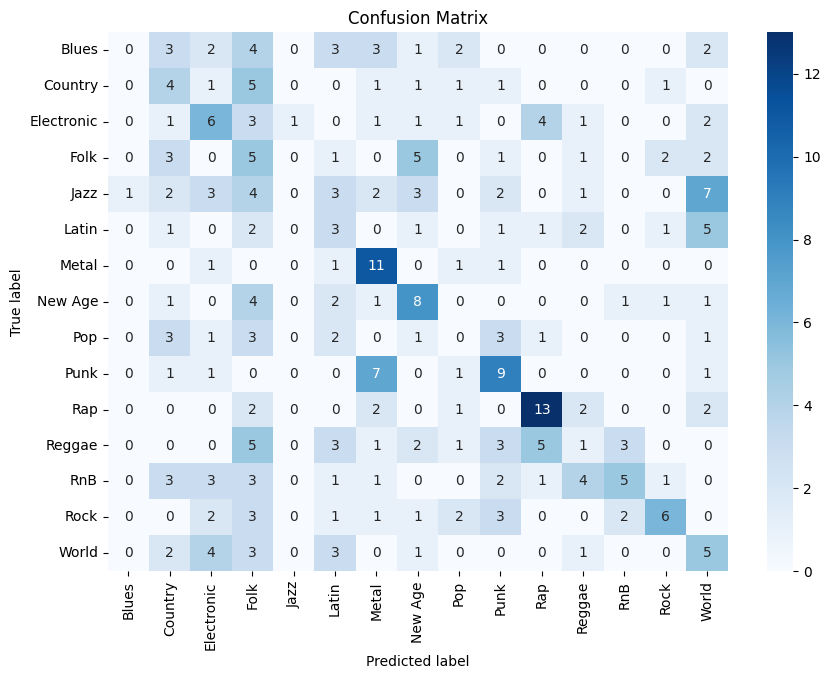

ROC AUC Score: 0.72


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
from tensorflow import keras
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the columns and output
cols_numeric = ['chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var', 'harmony_mean', 'perceptr_mean', 'tempo_x', 'duration_ms', 'energy', 'key', 'mode', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo_y', 'time_signature']
output_column = 'genre'

# Load data
data = pd.read_csv('../GeneratedData/reducedData.csv')
X = data[cols_numeric]
y = data[output_column]

# Encode labels and scale features
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Create and compile the model
model = keras.Sequential([
    keras.layers.Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(len(label_encoder.classes_), activation='softmax')  # Output layer for classification
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Make predictions
predictions = model.predict(X_test)
predicted_classes = predictions.argmax(axis=1)

# Inverse transform predicted genres
predicted_genres = label_encoder.inverse_transform(predicted_classes)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC AUC score for multi-class
# Use the one-hot encoding for multi-class ROC AUC
from sklearn.preprocessing import label_binarize

y_test_binarized = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))
roc_auc = roc_auc_score(y_test_binarized, predictions, multi_class='ovr')
print(f"ROC AUC Score: {roc_auc:.2f}")


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:44:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Accuracy: 0.28
Confusion Matrix:
[[ 4  4  1  2  0  2  4  0  0  1  1  2  2  1  0]
 [ 1  5  1  4  0  0  1  2  1  1  0  0  1  2  0]
 [ 1  0 12  0  4  1  1  2  3  0  3  0  0  0  0]
 [ 2  1  0  6  4  0  0  1  1  1  1  1  2  1  4]
 [ 2  1  1  1  7  2  3  2  0  2  1  2  0  1  5]
 [ 0  2  2  0  0  3  0  1  1  0  2  1  4  1  5]
 [ 1  0  2  1  0  0 11  0  1  1  2  0  0  3  0]
 [ 0  2  0  1  2  1  0 15  0  0  0  0  1  1  0]
 [ 1  2  2  2  0  1  1  2  1  0  0  3  2  1  2]
 [ 0  1  2  0  1  0  4  0  2 11  3  2  0  2  0]
 [ 1  0  4  0  1  2  1  1  3  0 14  0  2  0  0]
 [ 3  0  4  0  3  3  1  2  1  2  5  3  3  3  0]
 [ 1  2  1  3  1  2  2  0  1  1  1  4  6  2  0]
 [ 1  1  0  0  0  1  2  2  1  1  2  2  2  4  2]
 [ 0  5  1  2  2  2  1  1  3  0  0  1  3  1  3]]


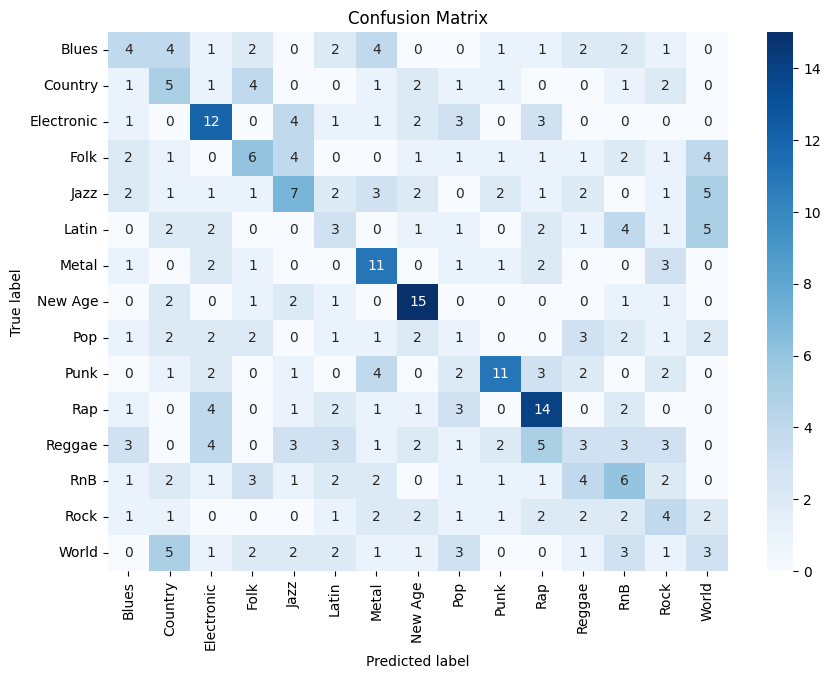

ROC AUC Score: 0.73


In [ ]:
# XGBOOST

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the columns and output
cols_numeric = ['chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var', 'harmony_mean', 'perceptr_mean', 'tempo_x', 'duration_ms', 'energy', 'key', 'mode', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo_y', 'time_signature']
output_column = 'genre'

# Load data
data = pd.read_csv('../GeneratedData/reducedData.csv')
X = data[cols_numeric]
y = data[output_column]

# Encode labels and scale features
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.25, random_state=42)

# Initialize the XGBoost classifier
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_estimators=10000, learning_rate=0.0005)

# Fit the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC AUC score for multi-class
# Use the one-hot encoding for multi-class ROC AUC
from sklearn.preprocessing import label_binarize

y_test_binarized = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))
y_pred_proba = model.predict_proba(X_test)

roc_auc = roc_auc_score(y_test_binarized, y_pred_proba, multi_class='ovr')
print(f"ROC AUC Score: {roc_auc:.2f}")


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load your data
data = pd.read_csv('../GeneratedData/reducedData.csv')

# Define features and target
cols_numeric = ['chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var', 'harmony_mean', 'perceptr_mean', 'tempo_x', 'duration_ms', 'energy', 'key', 'mode', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo_y', 'time_signature']
output_column = 'genre'

X = data[cols_numeric]
y = data[output_column]

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Set up the model
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_estimators=10000, learning_rate=0.0005)

# Perform cross-validation
cv_scores = cross_val_score(model, X_scaled, y_encoded, cv=5, scoring='accuracy')  # You can change 'cv' for number of folds

# Print the results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.2f} +- {cv_scores.std():.2f}")


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:01:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:04:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:07:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:10:43] WAR

Cross-Validation Scores: [0.26       0.26       0.29333333 0.27666667 0.27      ]
Mean Accuracy: 0.27 ± 0.01
